In [1]:
from pathlib import Path
import numpy as np
import torch
from torchvision.utils import make_grid, save_image
from matplotlib import pyplot as plt
from PIL import Image

from ex2mcmc.utils.general_utils import LOG_DIR, IMGS_DIR


2023-04-15 23:00:19.181004: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
steps = range(0, 1001, 50)

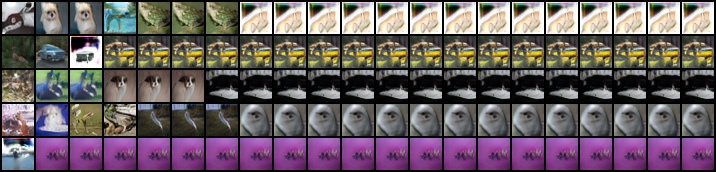

In [7]:
method = 'isir'
exp = f'mmc_dcgan_0.01_{method}'

imgs = []
for step in steps:
    img = np.load(Path(LOG_DIR, exp, 'images', f'{step}.npy'))[:5]
    imgs.append(torch.from_numpy(img)) #.mul(0.5).add(0.5))
imgs = torch.stack(imgs, 1).view(-1, 3, 32, 32)
grid = make_grid(imgs, nrow=len(steps))#, padding=0)
save_image(grid, Path(IMGS_DIR, f'mmc_dcgan_{method}.png')) 

grid = (255 * grid.permute(1, 2, 0).numpy()).astype('uint8')
Image.fromarray(grid)